<a href="https://colab.research.google.com/github/Kiet2k2/phantichdulieu/blob/main/doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt


# tải cơ sở dữ liệu CIFAR10 vào colab 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()
#print(train_X.shape)
# (50000, 32, 32, 3) Có 50000 tấm ảnh đào tạo có kích thước 32x32 pixel
# giá trị 3 ở đây tượng trưng cho màu RGB, cứ 3 giá trị trong khoảng 0-255 hình thành một màu (1 pixel)
#print(test_X.shape)
# (10000, 32, 32, 3) Có 10000 tấm ảnh kích thước 32x32 pixel cho tập test

# print(train_Y.shape) # (50000, 1) Có 50000 giá trị tương ứng với 50000 tấm ảnh train
# Đưa train_Y về dưới dạng mảng 1 chiều để dễ gọi giá trị
train_Y = train_Y.reshape(-1)
classes = ["máy bay", "ô tô", "chim", "mèo", "hươu", "chó", "ếch", "ngựa", "tàu thủy", "xe tải"]
# Kiểm soát kích thước hình ảnh hiển thị để dễ dàng nhận biết
"""
plt.figure(figsize = (15,2))
plt.imshow(train_X[10])
plt.xlabel(classes[train_Y[10]])
"""
# chuẩn hóa dữ liệu về kiểu float và nằm trong khoảng 0-1 nên chia cho 255 (đưa về trung bình là 0 và phương sai là 1)
train_X = train_X.astype('float32')
train_X = train_X / 255
test_X = test_X.astype('float32')
test_X = test_X / 255
#print(train_X)
#print(test_X)

nb_class=10
y_train=np_utils.to_categorical(train_Y,nb_class)
y_test=np_utils.to_categorical(test_Y,nb_class)

# Xây dựng mô hình CNN
cnn = models.Sequential([
        # filters là số lượng bộ lọc
        # kernel_size là kích thước ảnh (trong bài này là 32x32)
        # relu là một trong các hàm kích hoạt trong neural network, nó đơn giản là lọc các giá trị bé hơn 0
        # input_shape là hình ảnh đầu vào của ta
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Hàm Flatten làm phẳng đầu vào hay có thể nói là đưa về mảng một chiều
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        # 10 là thuộc tính units, là số chiều của không gian đầu ra
        # Hàm softmax tính khả năng (xác suất) xuất hiện của class
        layers.Dense(10, activation='softmax')
])

# Huấn luyện mô hình
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

170508288/170498071 [==============================] - 2s 0us/step


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 68s 43ms/step - loss: 1.4999 - accuracy: 0.4605 - val_loss: 1.2304 - val_accuracy: 0.5630
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1360 - accuracy: 0.6006 - val_loss: 1.0558 - val_accuracy: 0.6380
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9993 - accuracy: 0.6504 - val_loss: 0.9712 - val_accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9160 - accuracy: 0.6847 - val_loss: 0.9634 - val_accuracy: 0.6640
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8530 - accuracy: 0.7046 - val_loss: 0.9257 - val_accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8044 - accuracy: 0.7210 - val_loss: 0.9299 - val_accuracy: 0.6846
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7595 - accuracy: 0.7361 - val_loss: 0.9147 - val_accura

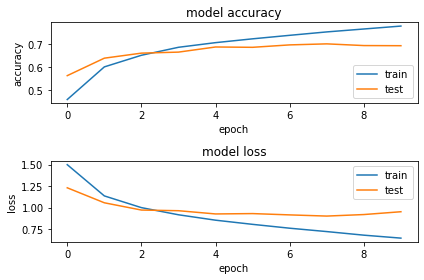

In [2]:
history = cnn.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))

# Đánh giá mô hình
fig = plt.figure ()
plt.subplot( 2,1,1 )
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title ('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='lower right')

plt.subplot (2,1,2)
plt.plot( history.history ['loss'])
plt.plot( history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()


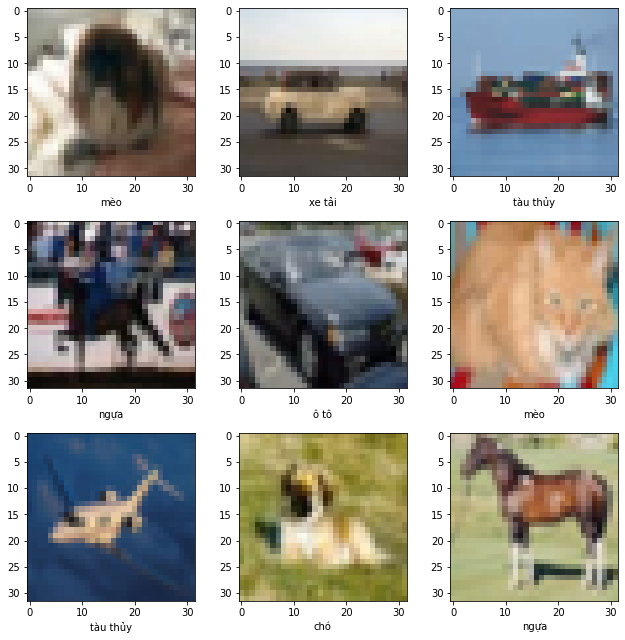

In [3]:
# Hiển thị ngẫu nhiên 9 tấm hình trong tập test và dự đoán
predicted_classes=cnn.predict(test_X)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=i+200
  plt.imshow(test_X[num])
  y_classes = [np.argmax(element) for element in predicted_classes]
  plt.xlabel(classes[y_classes[num]])
plt.tight_layout()

In [8]:
def load_image(filename):
  import numpy as np
  from PIL import Image
  # load tấm ảnh lên
  global label_packed
  image = Image.open(filename)
  image = image.resize((32,32))
  image = np.expand_dims(image, axis = 0)
  image = np.array(image)
  img=image.astype('float32')
  #chuẩn hóa dữ liệu về 0-
  img=img/255.0
  return img
img_test = load_image("cho1.jpg")
ob = cnn.predict(img_test)
print('Đây là: ',classes[np.argmax(ob)])

Đây là:  chó
